# IMPORTING ALL THE IMPORTANT LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/mental-health-detection-dataset/Deepression.csv')
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [4]:
df.isna().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [5]:
df.shape

(813, 16)

The below function replaces all the spaces ` `  with the underscore `_` , so as to make the usability of dataset much better 

In [6]:
def replace_spaces_in_columns(df):
    df.columns = df.columns.str.replace(' ', '_')
    return df

In [7]:
replace_spaces_in_columns(df)
df.columns

Index(['Number_', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal_Ideation', 'Sleep_Disturbance',
       'Aggression', 'Panic_Attacks', 'Hopelessness', 'Restlessness',
       'Low_Energy', 'Depression_State'],
      dtype='object')

In [8]:
df.drop(columns=['Number_'], inplace=True)
df = df.dropna(how='all')

In [9]:
df.shape

(540, 15)

In [10]:
df['Depression_State'].value_counts()

Depression_State
No depression       157
Mild                117
Moderate            109
Severe              108
\tNo depression      15
\tModerate           11
\tMild               11
\tSevere             10
2\tNo depression      1
5\tNo depression      1
Name: count, dtype: int64

In [11]:
def clean_depression_state(df, column_name):
    # Function to clean the Depression State column
    def clean_value(value):
        if isinstance(value, str):
            # Strip leading/trailing whitespace and tabs
            value = value.strip()
            
            # Remove any leading numbers and tabs
            value = ''.join([char for char in value if not char.isdigit() and char != '\t']).strip()
            # Normalize the values to a consistent format
            normalization_dict = {
                'no depression': 'No depression',
                'mild': 'Mild',
                'moderate': 'Moderate',
                'severe': 'Severe'
            }
            value = normalization_dict.get(value.lower(), value)
        return value
    # Apply the clean_value function to the specified column
    df[column_name] = df[column_name].apply(clean_value)
    return df


In [12]:
clean_depression_state(df ,'Depression_State')

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal_Ideation,Sleep_Disturbance,Aggression,Panic_Attacks,Hopelessness,Restlessness,Low_Energy,Depression_State
0,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,Mild
536,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,Severe
537,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,2.0,No depression
538,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Severe


In [13]:
df['Depression_State'].value_counts()

Depression_State
No depression    174
Mild             128
Moderate         120
Severe           118
Name: count, dtype: int64

In [14]:
for column in df.columns :
    print(df[column].value_counts())
    print("----------------------------------------------------------------")

Sleep
5.0    170
1.0    157
2.0    148
3.0     24
4.0     24
6.0     17
Name: count, dtype: int64
----------------------------------------------------------------
Appetite
5.0    172
1.0    170
2.0    148
3.0     26
4.0     24
Name: count, dtype: int64
----------------------------------------------------------------
Interest
5.0    174
1.0    170
2.0    148
3.0     24
4.0     24
Name: count, dtype: int64
----------------------------------------------------------------
Fatigue
5.0    174
2.0    154
1.0    145
4.0     26
3.0     24
6.0     17
Name: count, dtype: int64
----------------------------------------------------------------
Worthlessness
5.0    176
1.0    151
2.0    148
3.0     24
4.0     24
6.0     17
Name: count, dtype: int64
----------------------------------------------------------------
Concentration
5.0    172
1.0    168
2.0    152
3.0     24
4.0     24
Name: count, dtype: int64
----------------------------------------------------------------
Agitation
5.0    174
2.0    158

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

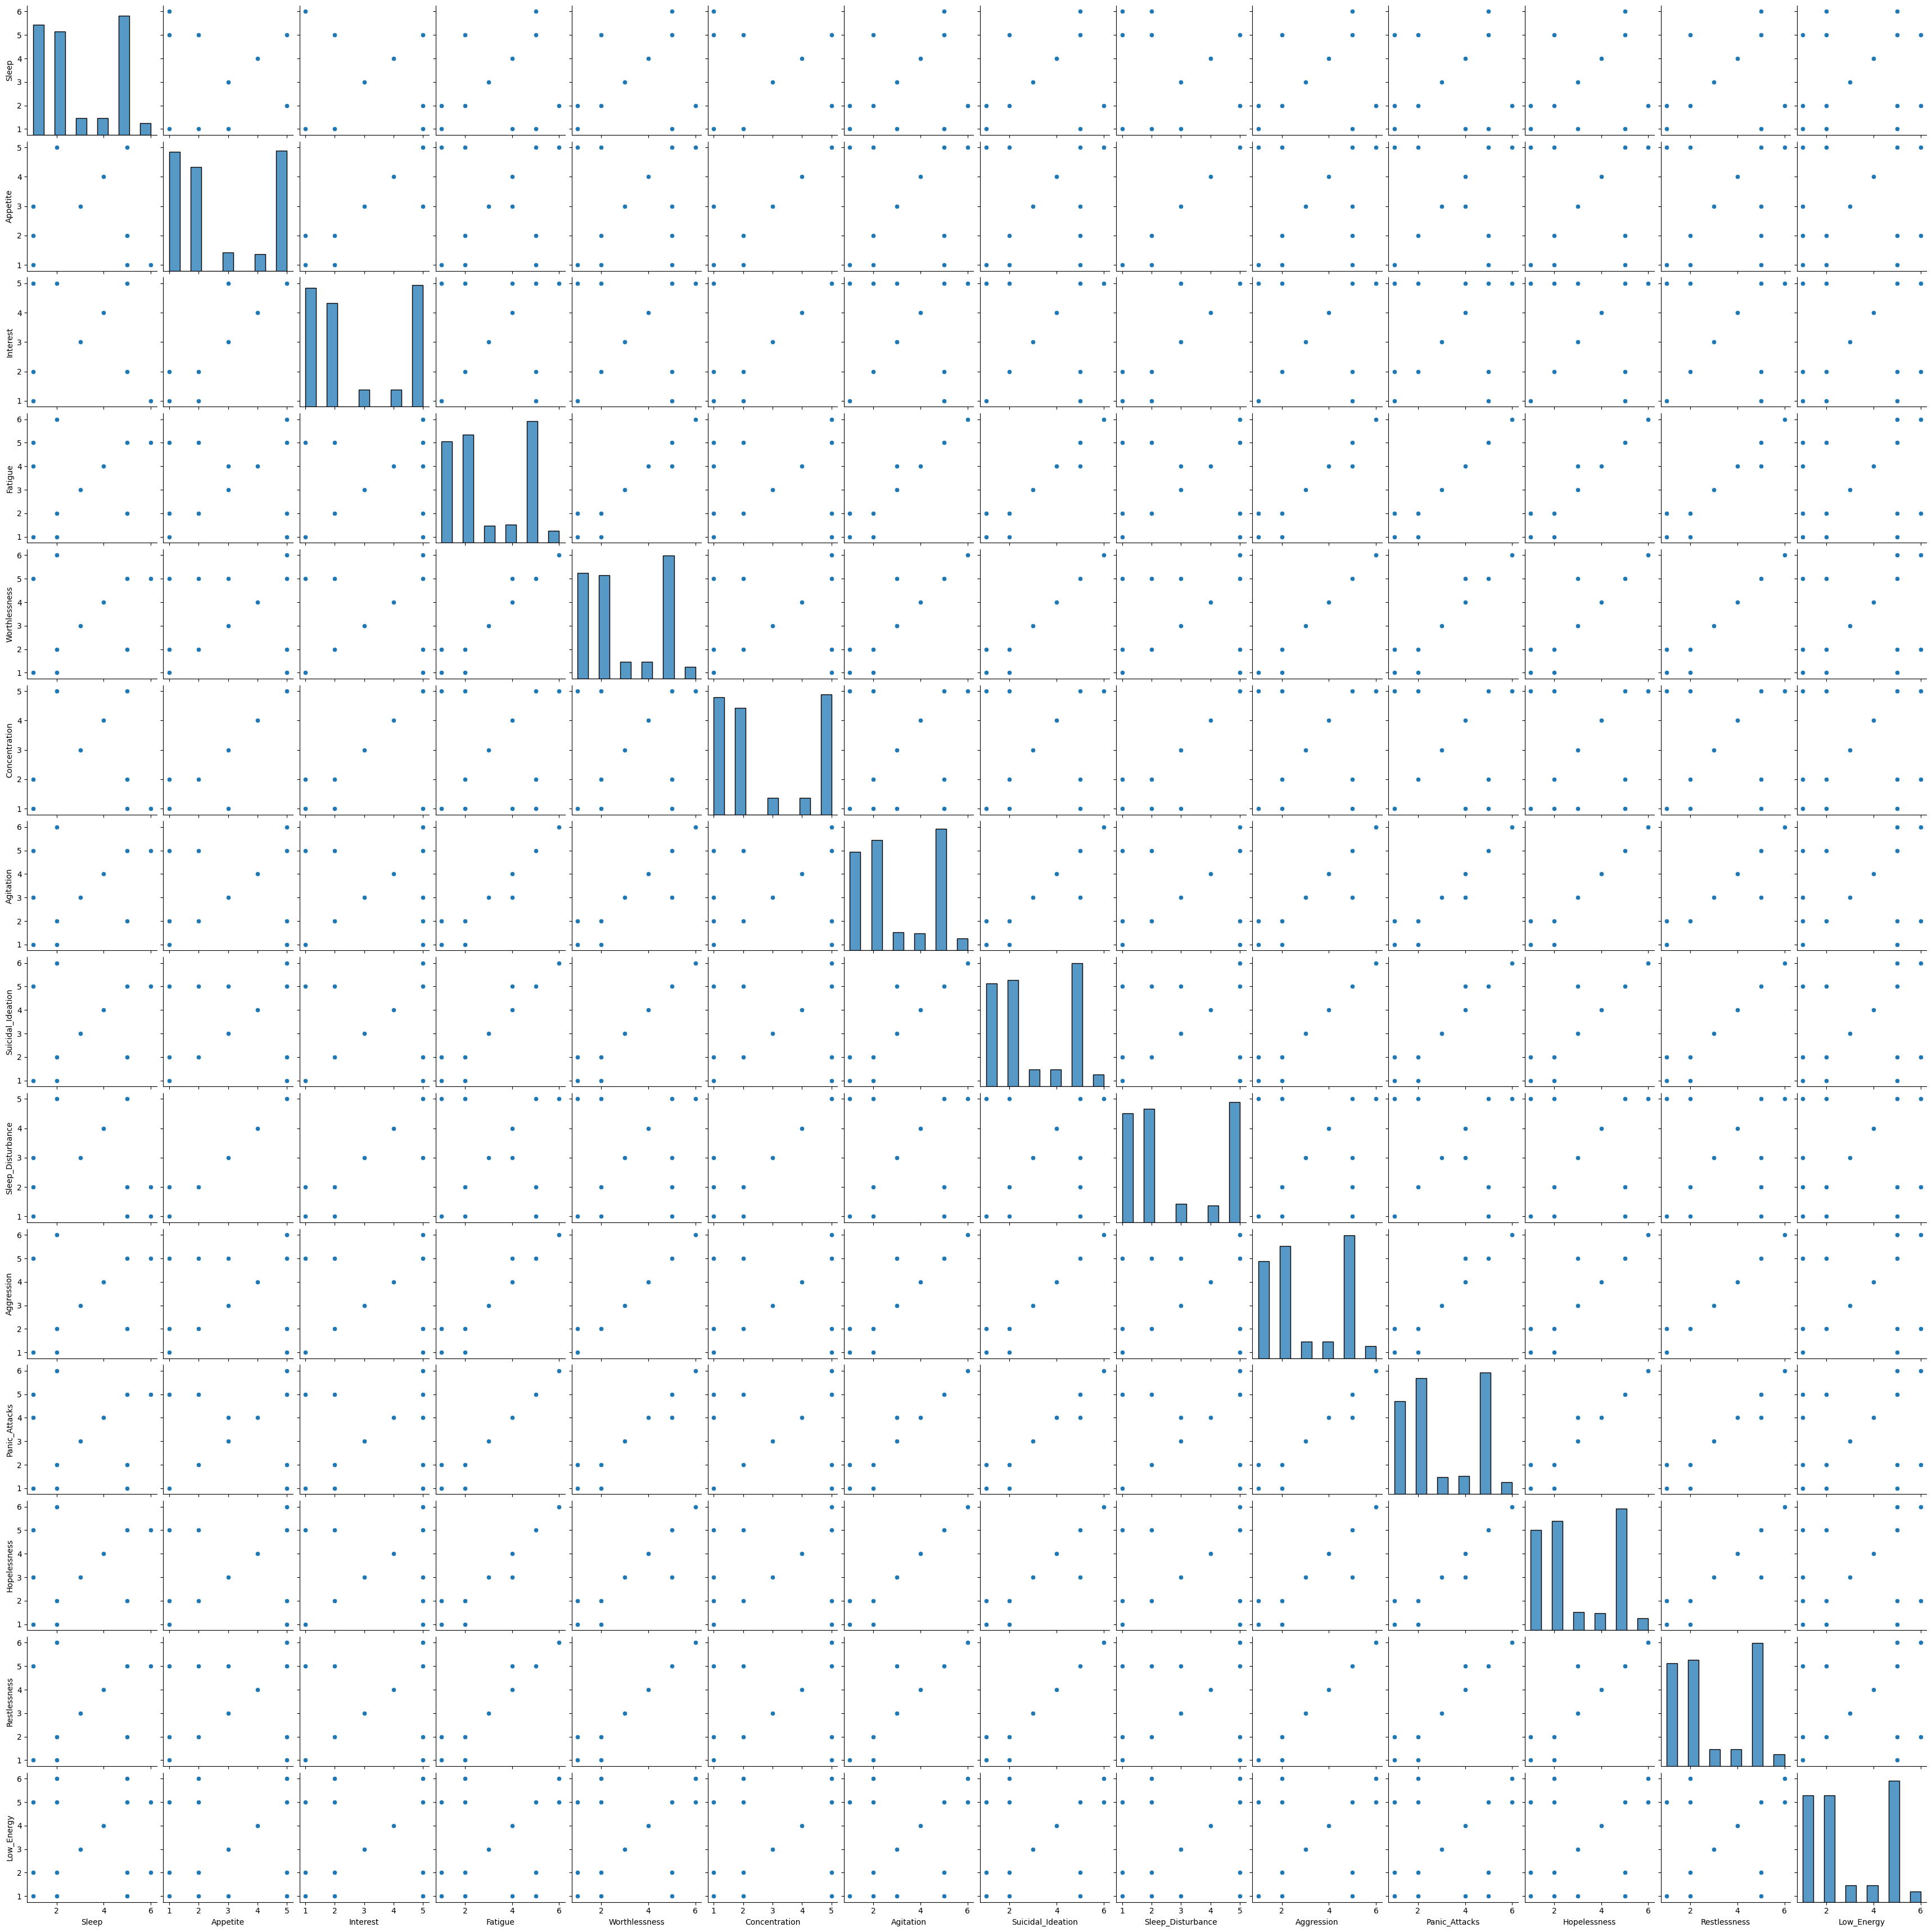

In [15]:
import seaborn as sns 
sns.pairplot(data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

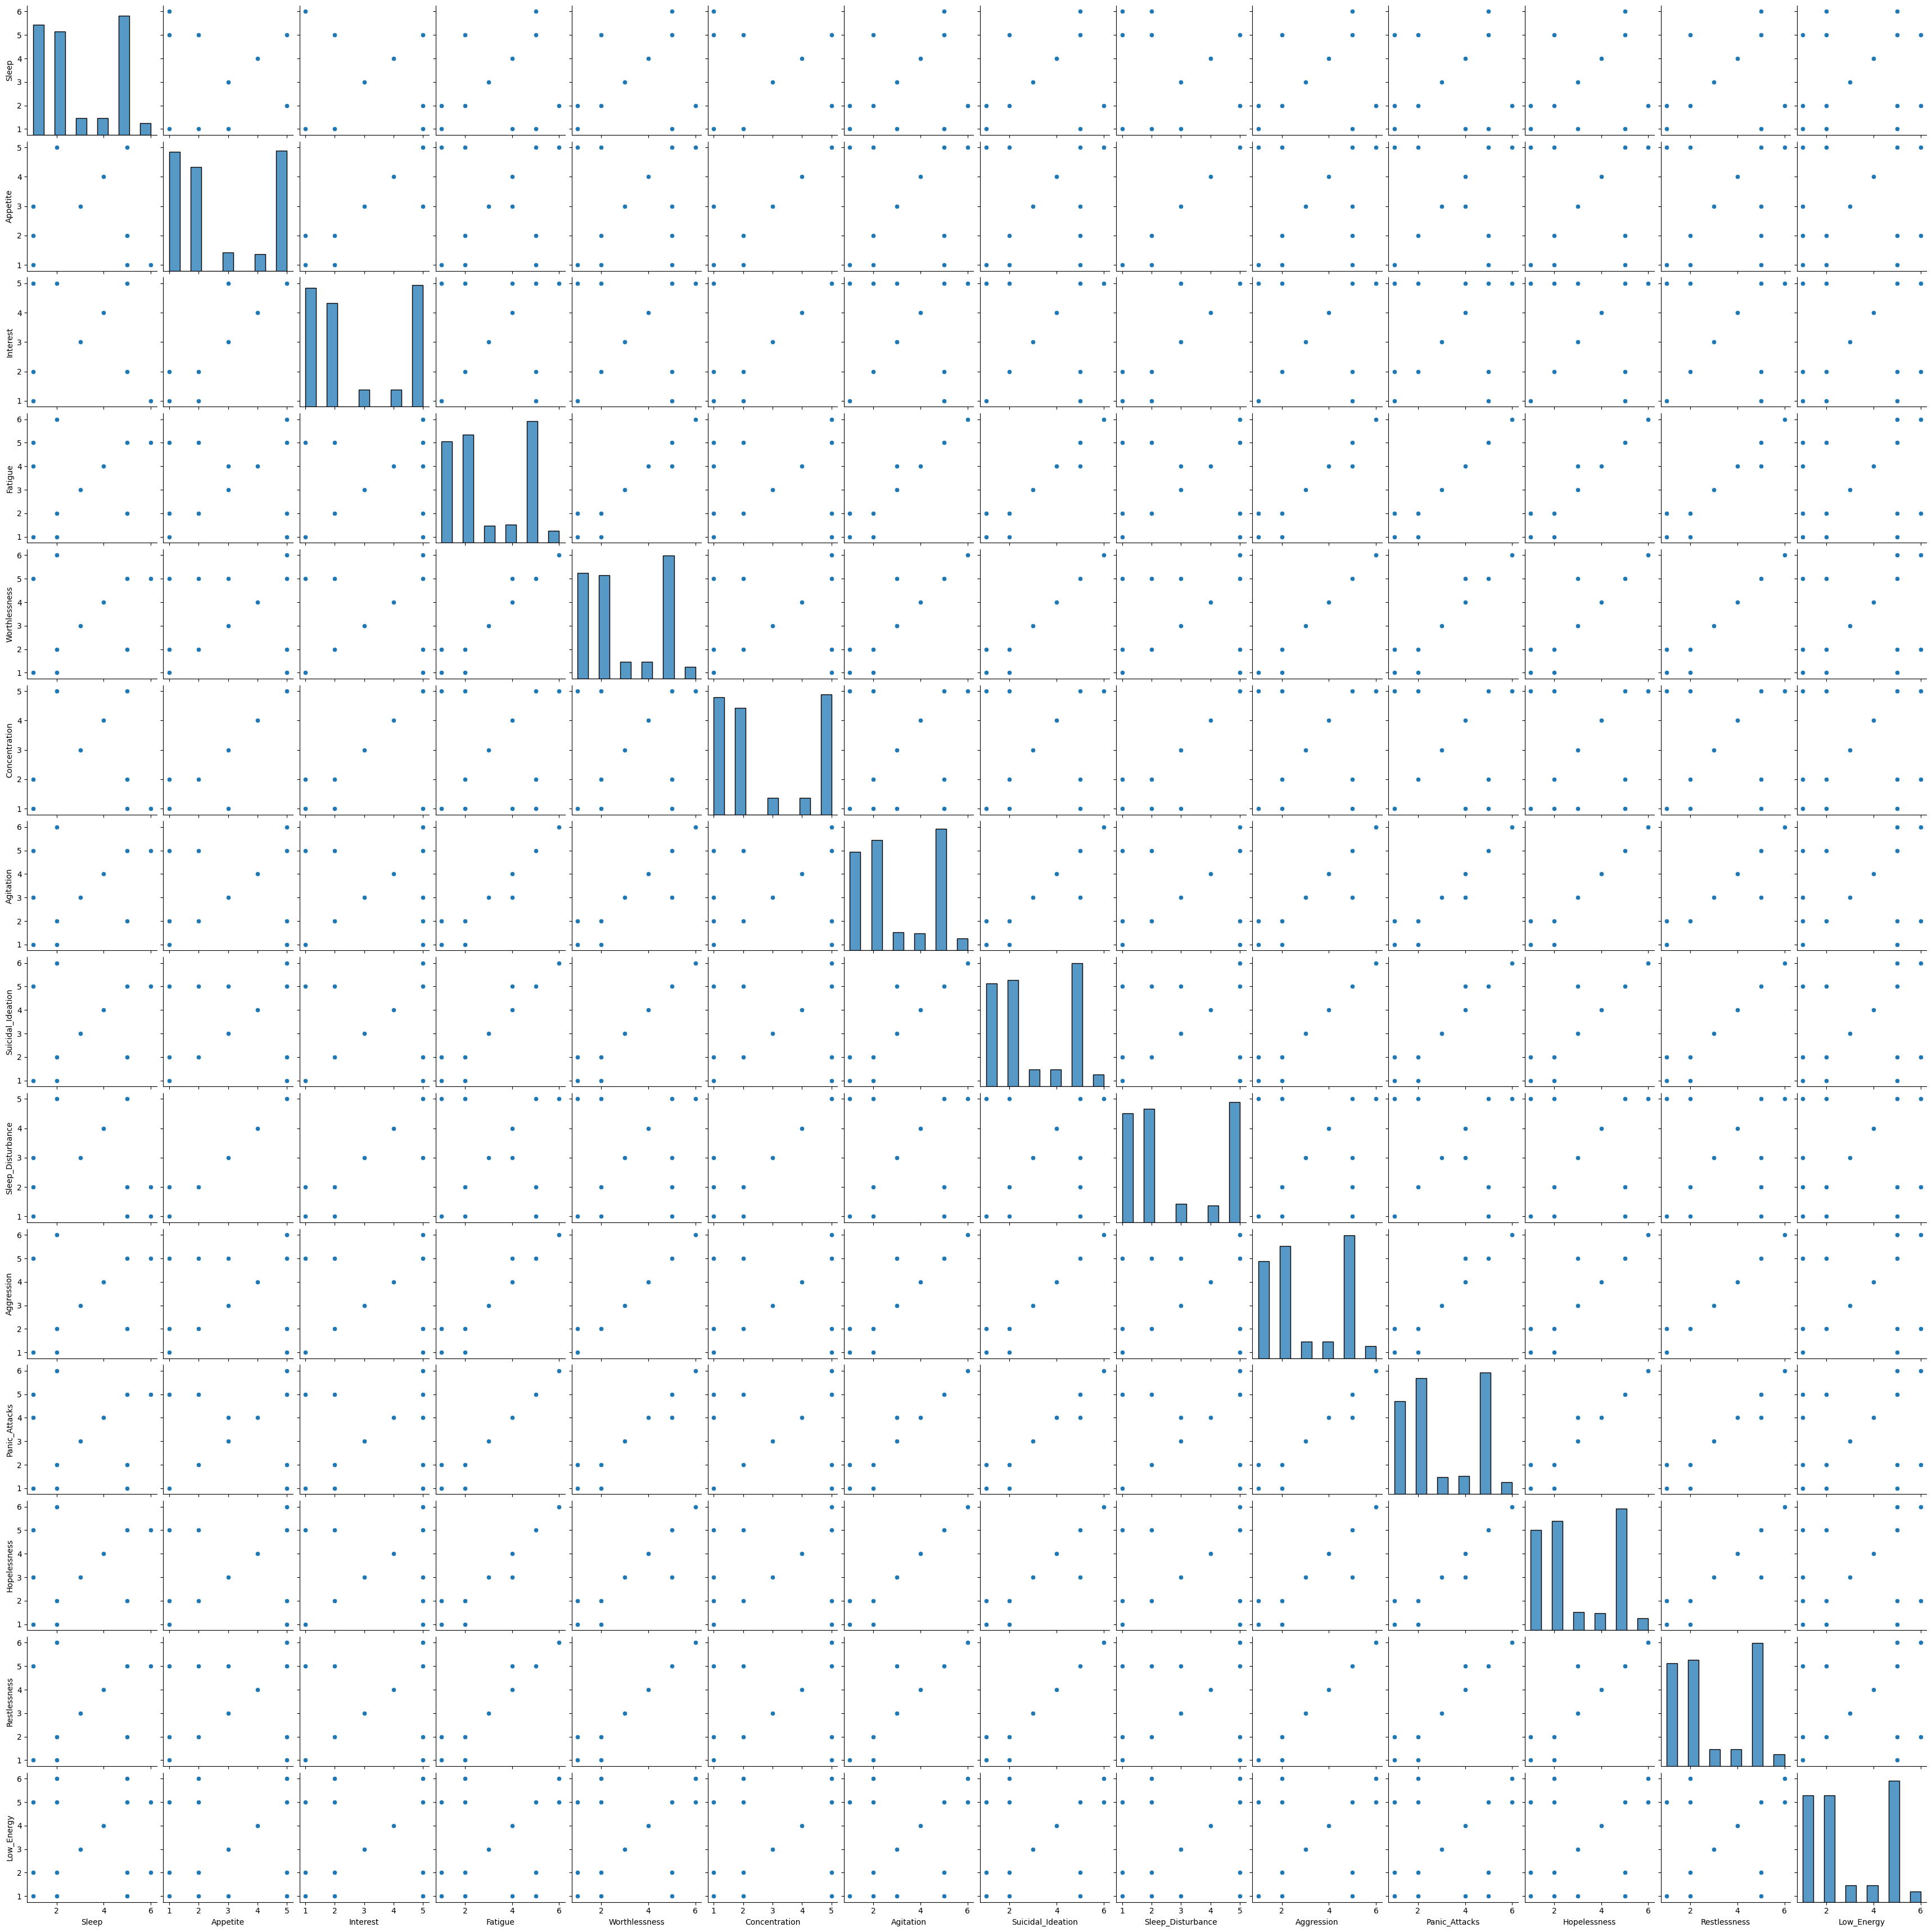

In [16]:
sns.pairplot(data=df , kind="scatter")